<class 'list'>
99
<class 'numpy.ndarray'>
(200, 200)


Liczba klatek: 99
Czas wykonania: 0:00:06.034438 sek


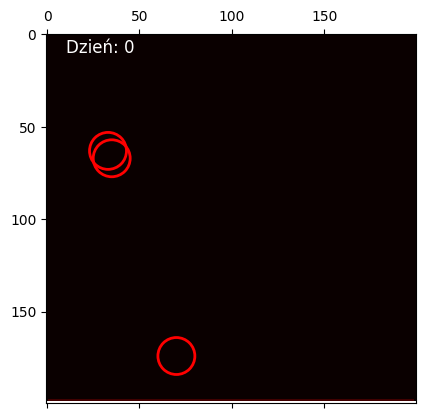

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
from IPython.display import HTML
from datetime import datetime
from IPython.display import display

start = datetime.now()

N=200

L = np.zeros((N, N))
Lnew = np.zeros((N, N))


L[199, :] = 50  
Lnew[199, :] = 50

step = 5 

x = np.arange(0, N * step, step) 
y = np.arange(0, N * step, step)

a = np.zeros((N,N))
a = a + 0.002

r1 = random.randrange(10, 190)
r2 = random.randrange(10, 190)

r3 = random.randrange(10, 190)
r4 = random.randrange(10, 190)

r5 = random.randrange(10, 190)
r6 = random.randrange(10, 190)

a[r1,r2] = 0.006
a[r3,r4] = 0.006
a[r5,r6] = 0.006

Y, X = np.meshgrid(np.arange(N), np.arange(N))

points = [(r1,r2),(r3,r4),(r5,r6)]
radius = 10

for x, y in points:
    mask = (X - x) ** 2 + (Y - y) ** 2 <= radius ** 2
    a[mask] = 0.006


a_max = 0.006

t=0
dt = (step*step)/(4*a_max)

#iteracje = 5000

def stop(L, Lnew):
    
    return np.abs(np.sum(Lnew) - np.sum(L))

def geotermal(L,Lnew,t):

    data =[]
    times = []
    e = 1
    
    #for k in range(1,iteracje):
    while e > 0.01:
    
        for i in range(1, N-1):
            for j in range(1, N-1):
                
                Lnew[i, j] = (1 - (4*dt*a[i,j]) / (step*step)) * L[i,j] + dt*a[i,j] * ((L[i-1,j]+L[i+1,j]+L[i,j-1]+L[i,j+1]) / (step*step))
        
        e = stop(L, Lnew)
        Lnew[:, 0] = L[:, 1]    
        Lnew[:, N-1] = L[:, N-2]
        data.append(Lnew.copy())  
        times.append(t)
        L[:] = Lnew  
        t= t+dt

    return [data,times]
    

data, times =geotermal(L,Lnew,t)

print(type(data))         # Powinno być listą
print(len(data))          # Powinno być 2499
print(type(data[0]))      # Powinno być numpy.ndarray
print(data[0].shape)


fig, ax = plt.subplots()
mat = ax.matshow(data[0], cmap = 'hot')

for x, y in points:
    circle = plt.Circle((y, x), radius, color='red', fill=False, linewidth=2)
    ax.add_patch(circle)

time_text = ax.text(10, 10, '', color='white', fontsize=12)

def update(frame):

    mat.set_array(data[frame])
    current_time = round(times[frame]/(3600*24))
    time_text.set_text(f'Dzień: {current_time}')
    return [mat,time_text]


matplotlib.rcParams['animation.embed_limit'] = 500
ani = animation.FuncAnimation(fig, update, frames=range(0, len(data), 10), interval=100, repeat=False)

display(HTML(ani.to_jshtml()))

print(f"Liczba klatek: {len(data)}")


elapsed_time = datetime.now() - start
print(f"Czas wykonania: {elapsed_time} sek")